In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [16]:
airline_passengers = pd.read_csv("international-airline-passengers.csv")
temperature_deg = pd.read_csv("mean-monthly-air-temperature-deg.csv")

In [17]:
# выбираем нужные колонки
airline_passengers_series = airline_passengers.iloc[:, 1]
temperature_deg_series = temperature_deg.iloc[:, 1]

In [18]:
airline_passengers_series.head()

0    112
1    118
2    132
3    129
4    121
Name: Count, dtype: int64

In [19]:
temperature_deg_series.head()

0    40.6
1    40.8
2    44.4
3    46.7
4    54.1
Name: Deg, dtype: float64

In [20]:
# Разделим на train / test
train_airline_passengers, test_airline_passengers = train_test_split(
    airline_passengers_series, 
    test_size=0.2, 
    random_state=12345
)

In [21]:
# Разделим на train / test
train_temperature_deg, test_temperature_deg = train_test_split(
    temperature_deg_series, 
    test_size=0.2, 
    random_state=12345
)

In [22]:
# ф-ии прогнозов MA, EMA, DEMA, TEMA
def MA(series, window=3):
    return series.rolling(window).mean().iloc[-1]

def EMA(series, alpha=0.3):
    return series.ewm(alpha=alpha).mean().iloc[-1]

def DEMA(series, alpha=0.3):
    ema = series.ewm(alpha=alpha).mean()
    ema2 = ema.ewm(alpha=alpha).mean()
    return (2*ema - ema2).iloc[-1]

def TEMA(series, alpha=0.3):
    ema1 = series.ewm(alpha=alpha).mean()
    ema2 = ema1.ewm(alpha=alpha).mean()
    ema3 = ema2.ewm(alpha=alpha).mean()
    return (3*ema1 - 3*ema2 + ema3).iloc[-1]

In [28]:

models_airline_passengers = {
    "MA": MA(train_airline_passengers, 3),
    "EMA": EMA(train_airline_passengers, 0.3),
    "DEMA": DEMA(train_airline_passengers, 0.3),
    "TEMA": TEMA(train_airline_passengers, 0.3)
}

# сравниваем ошибки (MAE или MSE)
for name, pred in models_airline_passengers.items():
    actual = test_airline_passengers.iloc[-1]
    mae = mean_absolute_error([actual], [pred])
    print(f"{name}: прогноз={pred:.2f}, реальное={actual:.2f}, ошибка MAE={mae:.2f}")

MA: прогноз=377.67, реальное=259.00, ошибка MAE=118.67
EMA: прогноз=327.03, реальное=259.00, ошибка MAE=68.03
DEMA: прогноз=313.09, реальное=259.00, ошибка MAE=54.09
TEMA: прогноз=287.01, реальное=259.00, ошибка MAE=28.01


TEMA: прогноз=287.01, реальное=259.00, ошибка MAE=28.01 - дает наименьшую ошибку

In [29]:
models_temperature_deg = {
    "MA": MA(train_temperature_deg, 3),
    "EMA": EMA(train_temperature_deg, 0.3),
    "DEMA": DEMA(train_temperature_deg, 0.3),
    "TEMA": TEMA(train_temperature_deg, 0.3)
}

# сравниваем ошибки (MAE или MSE)
for name, pred in models_temperature_deg.items():
    actual = test_temperature_deg.iloc[-1]
    mae = mean_absolute_error([actual], [pred])
    print(f"{name}: прогноз={pred:.2f}, реальное={actual:.2f}, ошибка MAE={mae:.2f}")

MA: прогноз=48.83, реальное=44.50, ошибка MAE=4.33
EMA: прогноз=49.02, реальное=44.50, ошибка MAE=4.52
DEMA: прогноз=47.97, реальное=44.50, ошибка MAE=3.47
TEMA: прогноз=46.81, реальное=44.50, ошибка MAE=2.31


TEMA: прогноз=46.81, реальное=44.50, ошибка MAE=2.31 - дает наименьшую ошибку

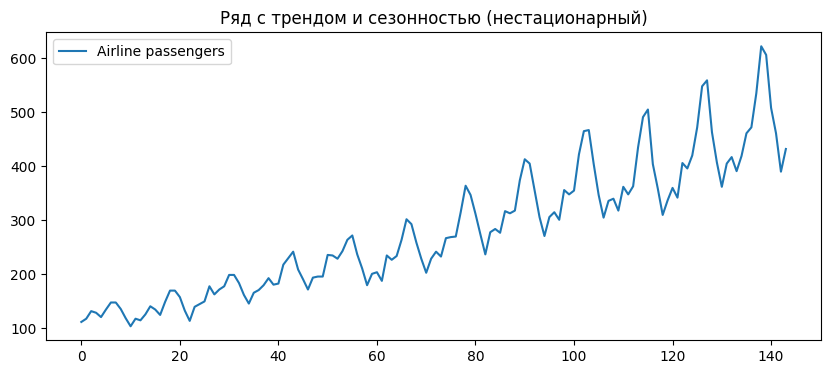

In [30]:

plt.figure(figsize=(10,4))
plt.plot(airline_passengers_series, label="Airline passengers")
plt.title("Ряд с трендом и сезонностью (нестационарный)")
plt.legend()
plt.show()

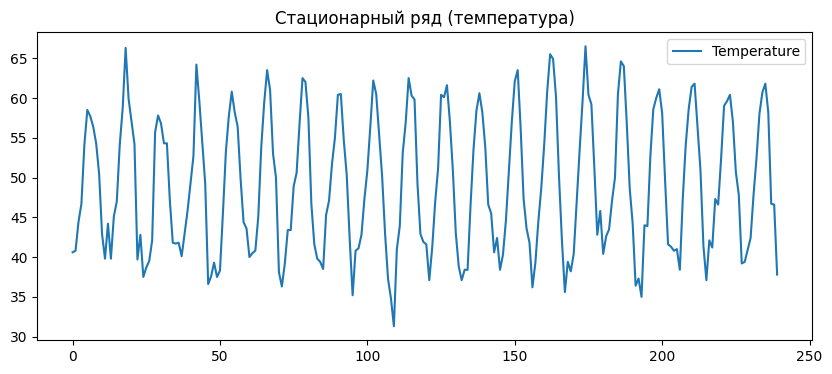

In [31]:
plt.figure(figsize=(10,4))
plt.plot(temperature_deg_series, label="Temperature")
plt.title("Стационарный ряд (температура)")
plt.legend()
plt.show()